In [3]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.10.0


In [4]:
print(pd.__version__)
print(sns.__version__)

1.4.4
0.12.0


In [6]:
#mng데이터 로드
#shape => (columns,rows) -> 나옴
dataset=sns.load_dataset("mpg")
dataset.shape

(398, 9)

In [8]:
#결측치 처리 -빈칸 수 처리
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
#또다른 결측지 방법
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
#결측치 삭제
dataset=dataset.dropna()
dataset.shape

(392, 9)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [14]:
#문자 데이터 처리
#ex)name 삭제처리
dataset.pop("name")

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 392, dtype: object

In [15]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [16]:
#origin 열은 범주형 원-핫 인코딩으로 변환
origin=dataset.pop("origin")

In [18]:
dataset["usa"]=(origin=="usa")*1.0
dataset["europe"]=(origin=="europe")*1.0
dataset["japan"]=(origin=="japan")*1.0
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
393,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,1.0,0.0,0.0


In [77]:
#학습(8)-(train_dataset) 후 평가(2)-(test_dataset)
train_dataset=dataset.sample(frac=0.8,random_state=42)
rest_dataset=dataset.drop(train_dataset.index)
train_dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
218,36.0,4,79.0,58.0,1825,18.6,77,0.0,1.0,0.0
281,19.8,6,200.0,85.0,2990,18.2,79,1.0,0.0,0.0
342,30.0,4,135.0,84.0,2385,12.9,81,1.0,0.0,0.0
238,33.5,4,98.0,83.0,2075,15.9,77,1.0,0.0,0.0
209,19.0,4,120.0,88.0,3270,21.9,76,0.0,1.0,0.0


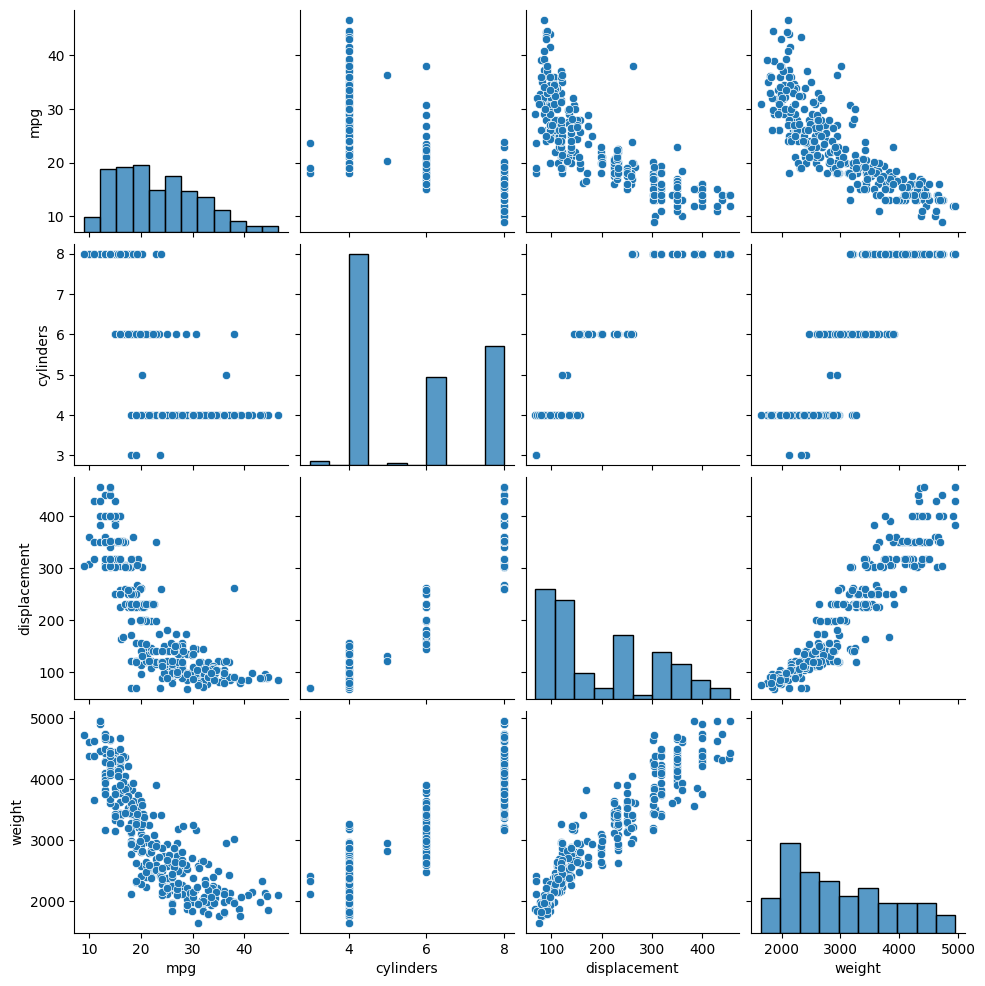

In [21]:
sns.pairplot(train_dataset[["mpg","cylinders","displacement","weight"]])

In [22]:
#기술 통계
train_state=train_dataset.describe()
train_state.pop("mpg")
train_state

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.531847,197.855096,105.971338,3005.745223,15.510828,75.910828,0.624204,0.171975,0.203822
std,1.729449,106.501896,39.636557,859.060925,2.803560,3.688989,0.485101,0.377961,0.403481
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.000000,76.000000,2231.000000,13.625000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,95.000000,2831.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,4955.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [23]:
#transpose() - 행과열을 바꿈
train_state=train_state.transpose()
train_state

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.531847,1.729449,3.0,4.000,4.0,8.00,8.0
displacement,314.0,197.855096,106.501896,68.0,105.000,151.0,302.00,455.0
horsepower,314.0,105.971338,39.636557,46.0,76.000,95.0,130.00,230.0
weight,314.0,3005.745223,859.060925,1649.0,2231.000,2831.5,3641.75,4955.0
acceleration,314.0,15.510828,2.803560,8.0,13.625,15.5,17.00,24.8
model_year,314.0,75.910828,3.688989,70.0,73.000,76.0,79.00,82.0
usa,314.0,0.624204,0.485101,0.0,0.000,1.0,1.00,1.0
europe,314.0,0.171975,0.377961,0.0,0.000,0.0,0.00,1.0
japan,314.0,0.203822,0.403481,0.0,0.000,0.0,0.00,1.0


In [78]:
#레이블-예측할려는 칼럼
#특성 - 다른 칼럼
#특성과 레이블을 분리한다 ->문제와 정답으로 분리

test_label=rest_dataset.pop("mpg")

In [74]:
train_label

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
218    36.0
281    19.8
342    30.0
238    33.5
209    19.0
Name: mpg, Length: 314, dtype: float64

In [79]:
test_label

1      15.0
13     14.0
20     25.0
21     24.0
35     17.0
       ... 
381    36.0
388    26.0
391    36.0
395    32.0
397    31.0
Name: mpg, Length: 78, dtype: float64

In [27]:
train_dataset

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
79,4,96.0,69.0,2189,18.0,72,0.0,1.0,0.0
276,4,121.0,115.0,2795,15.7,78,0.0,1.0,0.0
248,4,91.0,60.0,1800,16.4,78,0.0,0.0,1.0
56,4,91.0,70.0,1955,20.5,71,1.0,0.0,0.0
393,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
218,4,79.0,58.0,1825,18.6,77,0.0,1.0,0.0
281,6,200.0,85.0,2990,18.2,79,1.0,0.0,0.0
342,4,135.0,84.0,2385,12.9,81,1.0,0.0,0.0
238,4,98.0,83.0,2075,15.9,77,1.0,0.0,0.0


In [80]:
#데이터 정규화 -연산속도 업, 예측적중률 업
#범주를 일정 수 (일반적으로 -1~1사이 [표준표차이용])로 고정시키는것(그래프는 변화X)
def norm(x):
    return(x-train_state["mean"])/train_state["std"]
normed_train_data=norm(train_dataset)
normed_test_train_data=norm(rest_dataset)

In [81]:
normed_test_train_data

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
1,1.427132,1.428565,1.489248,0.800007,-1.430620,-1.602290,0.774676,-0.455006,-0.505158
13,1.427132,2.414463,3.003002,0.093422,-1.965654,-1.602290,0.774676,-0.455006,-0.505158
20,-0.885743,-0.824916,-0.478632,-0.388500,0.709517,-1.602290,-1.286751,2.190772,-0.505158
21,-0.885743,-0.853084,-0.402945,-0.670203,-0.360552,-1.602290,-1.286751,2.190772,-0.505158
35,0.270695,0.489615,-0.150652,0.376289,-0.003862,-1.331213,0.774676,-0.455006,-0.505158
...,...,...,...,...,...,...,...,...,...
381,-0.885743,-0.853084,-0.781383,-0.932117,-0.360552,1.650635,-1.286751,-0.455006,1.973274
388,-0.885743,-0.392999,-0.352486,-0.489773,-0.360552,1.650635,0.774676,-0.455006,-0.505158
391,-0.885743,-0.590178,-0.554320,-0.740047,-0.895586,1.650635,0.774676,-0.455006,-0.505158
395,-0.885743,-0.590178,-0.554320,-0.827351,-1.394951,1.650635,0.774676,-0.455006,-0.505158


In [29]:
normed_train_data.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
218,-0.885743,-1.115990,-1.210280,-1.374460,1.101875,0.295249,-1.286751,2.190772,-0.505158
281,0.270695,0.020140,-0.529091,-0.018328,0.959199,0.837404,0.774676,-0.455006,-0.505158
342,-0.885743,-0.590178,-0.554320,-0.722586,-0.931255,1.379558,0.774676,-0.455006,-0.505158
238,-0.885743,-0.937590,-0.579549,-1.083445,0.138814,0.295249,0.774676,-0.455006,-0.505158
209,-0.885743,-0.731021,-0.453403,0.307609,2.278950,0.024172,-1.286751,2.190772,-0.505158


In [31]:
len(train_dataset)

314

In [35]:
#모델만들기  mae(오차) mae(제곱 표준편차?)
def build_model():
    model=keras.Sequential([
        layers.Dense(64,input_shape=[len(train_dataset.keys())], activation="relu"),
        layers.Dense(64,activation="relu"),
        layers.Dense(1)
    ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)  #오답처리 알고리즘
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae","mse"])
    return model

In [36]:
#모델 확인
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [37]:
#모델 훈련
# 1000번 반복 ->에포크(별칭)
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch%100==0: 
            print("")
        print(',',end="")
EPOCHS=1000
model=build_model()
history=model.fit(
    normed_train_data,train_label,
    epochs=EPOCHS,validation_split=0.2,verbose=0,
    callbacks=[PrintDot()]
)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [38]:
hist=pd.DataFrame(history.history)
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
995,2.596299,0.989879,2.596299,4.975587,1.848381,4.975587
996,2.738379,1.061473,2.738379,4.914537,1.813719,4.914537
997,2.546395,1.010536,2.546395,4.825803,1.802997,4.825803
998,2.495500,0.996421,2.495500,4.603568,1.745763,4.603568
999,2.695028,1.044168,2.695028,5.238563,1.867668,5.238563


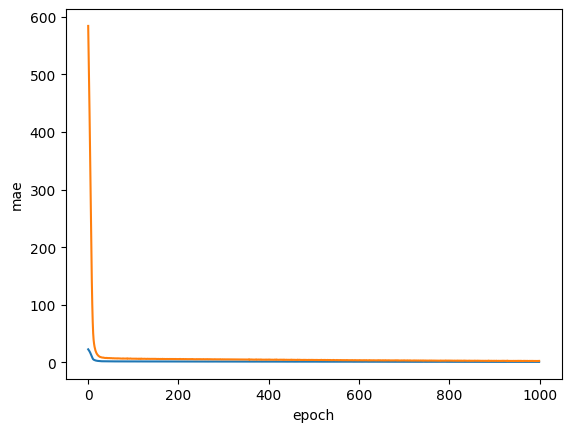

In [39]:
# 학습 1000번이 가성비 효율이 좋은가?
# 학습 진행하며 오차율을 시각화
def sns_hist(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    sns.lineplot(data=hist,x="epoch",y="mae")
    sns.lineplot(data=hist,x="epoch",y="mse")
sns_hist(history)

In [41]:
#model.fit을 수정해서 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 하는 것으로 수정(val_Loss기준)
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor="val_loss",patience=10)
history=model.fit(
    normed_train_data,train_label,
    epochs=EPOCHS,validation_split=0.2,verbose=0,
    callbacks=[PrintDot(),early_stop]
)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [42]:
history=model.fit(
    normed_train_data,train_label,
    epochs=EPOCHS,validation_split=0.2,verbose=1,
    callbacks=[early_stop]
)

Epoch 1/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.0826 - mae: 1.7298 - mse: 6.0826 - val_loss: 4.4117 - val_mae: 1.6124 - val_mse: 4.4117
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 6.0752 - mae: 1.7158 - mse: 6.0752 - val_loss: 4.4736 - val_mae: 1.5850 - val_mse: 4.4736
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 6.4323 - mae: 1.7619 - mse: 6.4323 - val_loss: 4.1393 - val_mae: 1.5545 - val_mse: 4.1393
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 6.0563 - mae: 1.7309 - mse: 6.0563 - val_loss: 4.3113 - val_mae: 1.6038 - val_mse: 4.3113
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 5.9890 - mae: 1.7148 - mse: 5.9890 - val_loss: 4.1011 - val_mae: 1.5716 - val_mse: 4.1011
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 6.0961 - mae: 1.7467 - mse: 6.0961 - val_loss: 4.2793 - val_mae: 1.6228 - val_mse: 4.2793
Epoch 7/1000
8/8 [==========

In [43]:
history=model.fit(
    normed_train_data,train_label,
    epochs=EPOCHS,validation_split=0.2,verbose=2,
    callbacks=[early_stop]
)

Epoch 1/1000
8/8 - 0s - loss: 6.2039 - mae: 1.7551 - mse: 6.2039 - val_loss: 3.9918 - val_mae: 1.5217 - val_mse: 3.9918 - 56ms/epoch - 7ms/step
Epoch 2/1000
8/8 - 0s - loss: 5.8149 - mae: 1.6606 - mse: 5.8149 - val_loss: 3.9716 - val_mae: 1.5682 - val_mse: 3.9716 - 24ms/epoch - 3ms/step
Epoch 3/1000
8/8 - 0s - loss: 5.8931 - mae: 1.6886 - mse: 5.8931 - val_loss: 4.4954 - val_mae: 1.5589 - val_mse: 4.4954 - 22ms/epoch - 3ms/step
Epoch 4/1000
8/8 - 0s - loss: 5.9847 - mae: 1.7005 - mse: 5.9847 - val_loss: 4.1455 - val_mae: 1.5307 - val_mse: 4.1455 - 23ms/epoch - 3ms/step
Epoch 5/1000
8/8 - 0s - loss: 5.8494 - mae: 1.7004 - mse: 5.8494 - val_loss: 4.0461 - val_mae: 1.5673 - val_mse: 4.0461 - 24ms/epoch - 3ms/step
Epoch 6/1000
8/8 - 0s - loss: 5.9717 - mae: 1.7031 - mse: 5.9717 - val_loss: 3.9829 - val_mae: 1.5622 - val_mse: 3.9829 - 23ms/epoch - 3ms/step
Epoch 7/1000
8/8 - 0s - loss: 5.7336 - mae: 1.6629 - mse: 5.7336 - val_loss: 4.0752 - val_mae: 1.5320 - val_mse: 4.0752 - 24ms/epoch - 3

In [44]:
history=model.fit(
    normed_train_data,train_label,
    epochs=EPOCHS,validation_split=0.2,verbose=3,
    callbacks=[early_stop]
)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000


In [45]:
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor="val_loss",patience=10)
history=model.fit(
    normed_train_data,train_label,
    epochs=EPOCHS,validation_split=0.2,verbose=3,
    callbacks=[early_stop]
)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

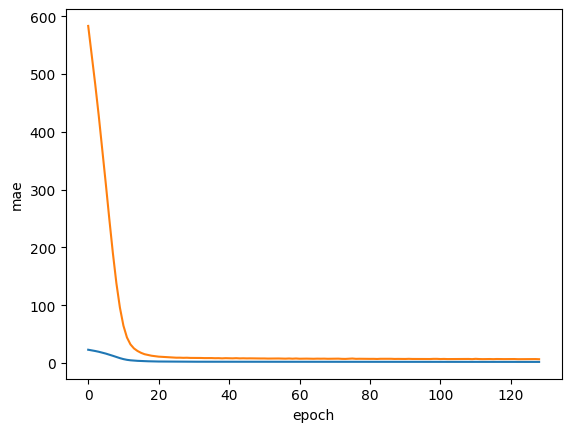

In [46]:
sns_hist(history)

In [58]:
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor="val_loss",patience=10)
history=model.fit(
    normed_train_data,train_label,
    epochs=EPOCHS,validation_split=0.2,verbose=0,
    callbacks=[PrintDot(),early_stop]
)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,

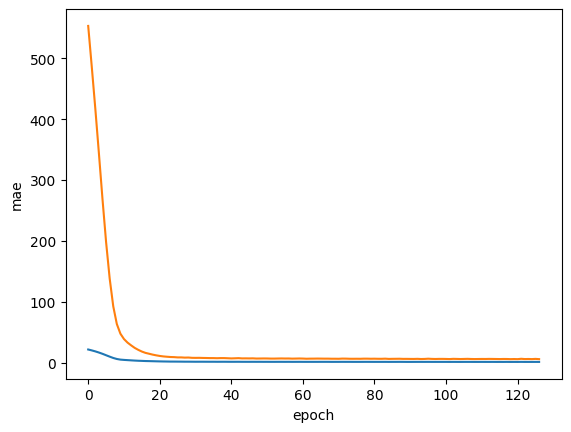

In [60]:
sns_hist(history)

In [82]:
#성능평가
loss,mae,mse=model.evaluate(normed_test_train_data,test_label,verbose=2)
print("테스트 세트의 평균 절대 오차 :",mae,"MPG")
print("테스트 세트의 평균 절대 오차 : {:.2f} MPG".format(mae,mse))

3/3 - 0s - loss: 6.4273 - mae: 1.8317 - mse: 6.4273 - 18ms/epoch - 6ms/step
테스트 세트의 평균 절대 오차 : 1.831720232963562 MPG
테스트 세트의 평균 절대 오차 : 1.83 MPG


In [83]:
#시각화해서 평가
#예측
test_predictions=model.predict(normed_test_train_data).flatten()
test_predictions

3/3 [==============================] - 0s 998us/step


array([14.858199, 15.603004, 20.85716 , 22.103128, 17.368317, 12.62925 ,
       26.98019 , 23.554222, 25.38057 , 29.246922, 29.920355, 26.473736,
       26.581219, 14.101639, 23.68384 , 14.099108, 14.045229, 13.050573,
       18.418486, 13.3832  , 12.446352, 18.639427, 20.620577, 21.96355 ,
       14.1896  , 27.893604, 17.167076, 15.841931, 16.704115, 21.390144,
       21.436241, 18.630245, 16.333864, 15.029993, 18.847   , 18.053616,
       19.938122, 30.599396, 21.311993, 15.828066, 31.656525, 25.352749,
       29.849884, 22.487268, 33.838295, 19.539392, 22.210545, 21.234135,
       18.316837, 16.842367, 29.949135, 21.396217, 22.074644, 18.255775,
       32.343834, 32.54381 , 24.530666, 24.824924, 27.538912, 36.35453 ,
       32.73403 , 23.457714, 33.612465, 32.035957, 34.222458, 21.693094,
       37.067986, 36.274536, 30.999752, 24.563583, 24.441303, 24.303436,
       36.15599 , 34.72387 , 29.2006  , 33.019978, 34.810814, 28.758541],
      dtype=float32)

<AxesSubplot:xlabel='mpg'>

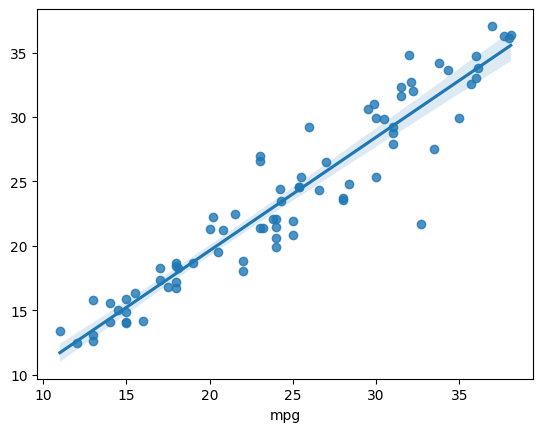

In [84]:
sns.regplot(x=test_label,y=test_predictions)

<AxesSubplot:xlabel='mpg'>

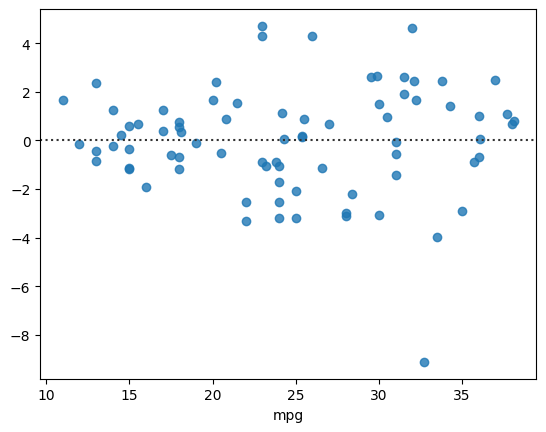

In [85]:
sns.residplot(x=test_label,y=test_predictions)

In [86]:
#오차분표
erroe=test_predictions-test_label
erroe.tail()

381   -1.276131
388    3.200600
391   -2.980022
395    2.810814
397   -2.241459
Name: mpg, dtype: float64

<AxesSubplot:>

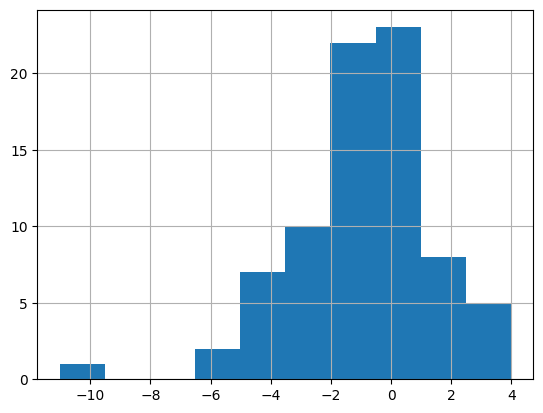

In [87]:
erroe.hist()